In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load data

In [2]:
df = pd.read_excel('Data_Train.xlsx')

# explore


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Observations:
*  Price is the only feature with int datatype
*  There are some NaN values in Route and Total_Stops

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# missing values

In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Observation: 
Since there is only 1 record with missing values, we can drop it.

In [9]:
print('shape of df before dropping NaN rows',df.shape)
df.dropna(axis=0,inplace=True)
print('shape of df after dropping NaN rows',df.shape)

shape of df before dropping NaN rows (10683, 11)
shape of df after dropping NaN rows (10682, 11)


# data cleaning

In [10]:
#cleaning the Date_of_Journey column
#method 1

# df['Journey_day'] = df['Date_of_Journey'].map(lambda x: x.split('/')).str[0].astype('int64')
# df['Journey_month'] = df['Date_of_Journey'].map(lambda x: x.split('/')).str[1].astype('int64')
# df['Journey_year'] = df['Date_of_Journey'].map(lambda x: x.split('/')).str[2].astype('int64')

In [11]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [12]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
#cleaning the Date_of_Journey column
#method 2

def change_dtype_to_datatime(col):
    '''
    this function takes input(column names) and changes the column dtype of the passed value to datetime using pandas.to_datetime() method
    input: column name
    output: returns nothing
    '''
    df[col] = pd.to_datetime(df[col],infer_datetime_format=True)

In [15]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

* columns that involve date and time here are Date_of_Journey, Dep_Time and Arrival_Time

In [16]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_dtype_to_datatime(i)
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

* dtype of the columns Date_of_Journey, Dep_Time and Arrival_Time has been changed
* now, we can retrieve date, month and year

In [17]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-10 05:50:00,2023-11-10 13:15:00,7h 25m,2 stops,No info,7662


In [18]:
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_year'] = df['Date_of_Journey'].dt.year

In [19]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-10 05:50:00,2023-11-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [20]:
def extract_hour_minute(dataframe, col):
    '''
    this function takes tqo parameters as input and create two new columns in dataframe for hour and minute
    input: param1 - dataframe name, param2 - column name
    output: returns nothing'''
    dataframe[col+'_hour'] = df[col].dt.hour
    dataframe[col+'_minute'] = df[col].dt.minute
    
for i in ['Dep_Time','Arrival_Time']:
    extract_hour_minute(df,i)

In [21]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-10 05:50:00,2023-11-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [22]:
df['Duration'][2].split()

['19h']

In [23]:
def clean_duration(x):
    if 'h' not in x:
        return '0h '+x
    elif 'm' not in x:
        return x+' 0m'
    elif ('h' not in x) and ('m' not in x):
        return '0'
    else:
        return x

In [24]:
df['Duration_new'] = df['Duration'].apply(clean_duration)

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_new
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2h 50m
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-10 05:50:00,2023-11-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7h 25m
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-10 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19h 0m
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-11-10 18:05:00,2023-11-10 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5h 25m
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-11-10 16:50:00,2023-11-10 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4h 45m


In [26]:
df['Duration_hour'] = df['Duration_new'].map(lambda x: x.split()[0]).str.replace('h','').astype(int)
df['Duration_minute'] = df['Duration_new'].map(lambda x: x.split()[1]).str.replace('m','').astype(int)

In [27]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_new,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,...,24,3,2019,22,20,1,10,2h 50m,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-10 05:50:00,2023-11-10 13:15:00,7h 25m,2 stops,No info,...,1,5,2019,5,50,13,15,7h 25m,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-10 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,...,9,6,2019,9,25,4,25,19h 0m,19,0


In [28]:
df['Duration_in_minutes'] = df['Duration_hour']*60 + df['Duration_minute']

In [29]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_new,Duration_hour,Duration_minute,Duration_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,...,3,2019,22,20,1,10,2h 50m,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-10 05:50:00,2023-11-10 13:15:00,7h 25m,2 stops,No info,...,5,2019,5,50,13,15,7h 25m,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-10 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,...,6,2019,9,25,4,25,19h 0m,19,0,1140


## scatterplot

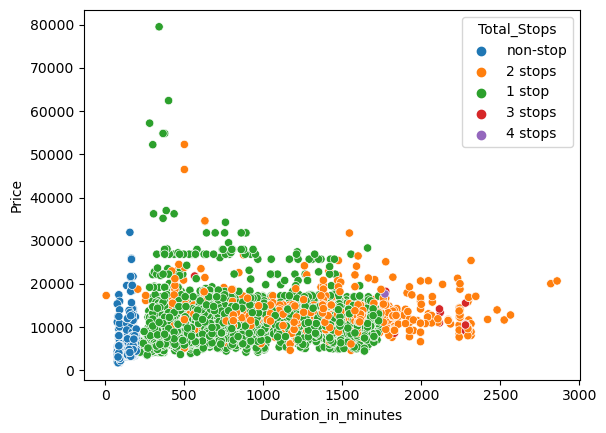

In [30]:
sns.scatterplot(x ='Duration_in_minutes', y='Price',data=df,hue='Total_Stops')
plt.show()

### Observations:
*  the blue points indicate the non-stop flights. They take less duration as there are no stops.
*  red and orange points indicate 3 and 2 stop flights. They usually take more time.
*  there are very few violet points, which indicate 4 stop flights
*  Note: Since this is a scatter plot, there is a chance that some points are covered by other points.

## Regression Plot

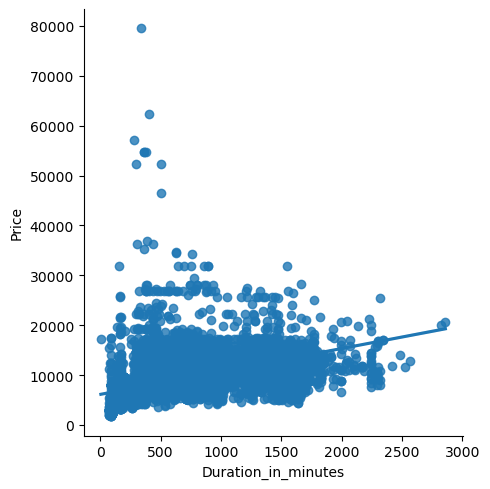

In [31]:
sns.lmplot(x ='Duration_in_minutes', y='Price',data=df)
plt.show()

*  The regression line shows that as there is an increase in duration_in_minutes, there is some increase in Price

# Analysis

## Question: which part of the day most of the flights takeoff?
note: categorize departure hours into differnt categories like 'early morning', 'Evening', 'noon', 'night', 'late night' 

In [32]:
df['Dep_Time_hour'].value_counts()

9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_Time_hour, dtype: int64

In [33]:
def takeoff_time_mode(hour):
    if hour > 4 and hour <= 8:
        return 'early morning'
    elif  hour > 10 and hour <= 12:
        return 'morning'
    elif  hour > 12 and hour <= 16:
        return 'noon'
    elif  hour > 16 and hour < 20:
        return 'evening'
    elif  hour > 20 and hour <= 24:
        return 'night'
    else:
        return 'late night'

[]

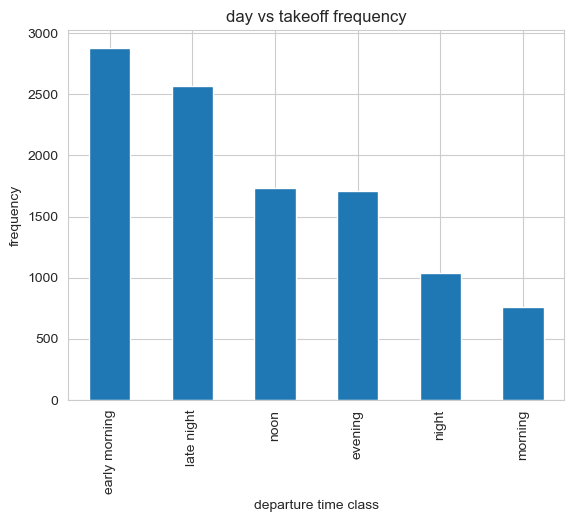

In [34]:
sns.set_style('whitegrid')
df['Dep_Time_hour'].apply(takeoff_time_mode).value_counts().plot.bar()
plt.xlabel('departure time class')
plt.ylabel('frequency')
plt.title('day vs takeoff frequency')
plt.plot()

### Observations:
*  Clearly, there are more flights that departure in the early morning.
*  There are less number of flights that departure at morning.

# Bi-variate analysis

### Q: On which route 'Jet Airways' is extremely used?

In [35]:
df[df['Airline']=='Jet Airways']['Route'].value_counts()

CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: Route, dtype: int64

### Observations:
*  'Jet Airways' is extremely used in the route CCU → BOM → BLR followed by DEL → BOM → COK

### Q: Airline vs price analysis

[]

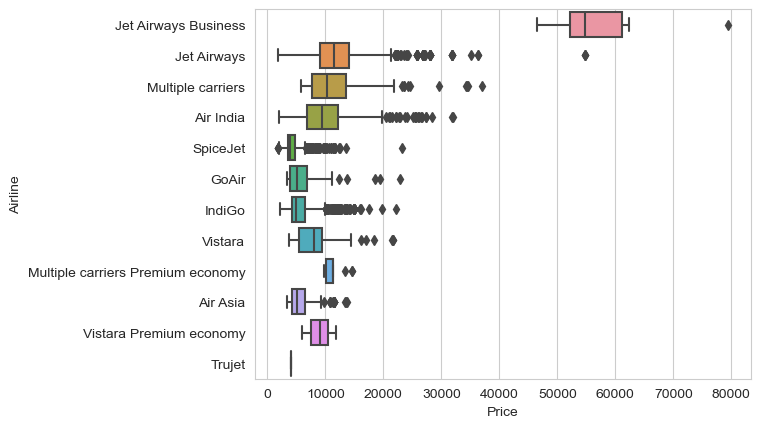

In [36]:
sns.boxplot(y="Airline", x="Price", data=df.sort_values('Price',ascending=False))
plt.plot()

### Observation:
*  Jet Airways Business's medium price is far greater than any other airlines. Its minimum price is also way greater than other airlines.


# Feature Engineering

### Feature Encoding: One hot encoding

In [37]:
#categorical features
[i for i in df.columns if df[i].dtype == 'object']

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Duration_new']

*  We don't need to consider Duration as categorical feature and perform feature engineering on it. We have already extracted information from that feature.

### Applying one-hot encoding on 'Source'

In [38]:
# performing one-hot encoding on the feature 'Source'. This would create new sub features.
for sub_source in df['Source'].unique():
    df['Source_'+sub_source] = df['Source'].apply(lambda x: 1 if x ==sub_source else 0)

*  When dealing with numerous categorical features and a high number of unique values within each, it is not recommended to apply one-hot encoding to all of them. This approach would generate an excessive number of new features, potentially leading to the 'curse of dimensionality.'

## target guided encoding

In [39]:
# on the feature Airline
# method 1
airway_dict = dict()
count = 0
for idx in df.groupby('Airline')['Price'].mean().sort_values().index:
    airway_dict[idx] = count
    count+=1
print(airway_dict)

{'Trujet': 0, 'SpiceJet': 1, 'Air Asia': 2, 'IndiGo': 3, 'GoAir': 4, 'Vistara': 5, 'Vistara Premium economy': 6, 'Air India': 7, 'Multiple carriers': 8, 'Multiple carriers Premium economy': 9, 'Jet Airways': 10, 'Jet Airways Business': 11}


*  We assign numeric values to airlines by first calculating the mean price for each airline, then sorting them. The airlines with the lowest mean prices are assigned lower numeric values, starting from 0, while those with the highest mean prices receive the maximum numeric values among all the airlines.

In [40]:
# method 2
# cc_dict = {}
# for i,j in enumerate(df.groupby('Airline')['Price'].mean().sort_values().index):
#     cc_dict[j]=i
# print(cc_dict)

In [41]:
df['Airline_encoded'] = df['Airline'].map(airway_dict)

In [42]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Duration_new,Duration_hour,Duration_minute,Duration_in_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Airline_encoded
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,...,2h 50m,2,50,170,1,0,0,0,0,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-10 05:50:00,2023-11-10 13:15:00,7h 25m,2 stops,No info,...,7h 25m,7,25,445,0,1,0,0,0,7
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-10 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,...,19h 0m,19,0,1140,0,0,1,0,0,10


## manual encoding